# Wrangle Project

In [1]:
# Import packages needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import tweepy
import json

% matplotlib inline
# fully display the `text` content
pd.set_option('max_colwidth',200)

## Collect data
### Object
#### 1. given twitter data

  upload

#### 2. prediction image data
  
  download with `requests` from url `https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv`
  
#### 3. additional data from json file

  since it's difficult to get access to twitter, we use provided txt file.

### Log
#### 1. given twitter data

  Upload `twitter-archive-enhanced.csv`

#### 2. prediction image data

  Use requests to download data from given url

In [2]:
# use requests to download
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(url)
# save text to Prediction-image-data.csv
file_name = 'image_predictions.tsv'
with open(file_name, 'w') as file:
    file.write(r.text)

#### 3. additional data from json file
  Upload `tweet_json.txt`
  
### Read file

- [Read multi json objects](https://www.jianshu.com/p/b6a02b49845c)

In [3]:
# in github:
# tweet_info = pd.read_csv('Data/twitter-archive-enhanced.csv')
# image_info = pd.read_csv('Data/image_predictions.tsv', sep='\t')
# in udacity
tweet_info = pd.read_csv('twitter-archive-enhanced.csv')
image_info = pd.read_csv('image_predictions.tsv', sep='\t')
# json.load can't deal with multiple json objects, use dump first
tweet_json_info = []
with open('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        tweet_json_info.append(json.loads(line))

### Conclude

Data stored in `tweet_info`, `image_info`, `tweet_json_info`

## Assess

Dataset: `tweet_info`, `image_info`, `tweet_json_info`

- Missing data
- Format
- Accuracy
- Consistency

[Tweet data reference](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object.html)

### 1. tweet_info

In [4]:
tweet_info.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unique dog here. Oddly shaped tail. Long pink front legs. I don't think dogs breath underwater sos. 4/10 bad owner https://t.co/0EJXxE9UxW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893510119424/photo/1,4,10,None,None,None,None,None
1360,703268521220972544,NaN,NaN,2016-02-26 17:20:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Friday here's a sleepy pupper 12/10 https://t.co/eBcqv9SPkY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703268521220972544/photo/1,12,10,None,None,None,pupper,None
1437,697242256848379904,NaN,NaN,2016-02-10 02:14:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Oakley. He has a massive tumor growing on his head. Seems benign tho. 10/10 would pet around tumor https://t.co/7GQ7BTxywN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697242256848379904/photo/1,10,10,Oakley,None,None,None,None
908,757729163776290825,NaN,NaN,2016-07-26 00:08:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Chompsky. He lives up to his name. 11/10 https://t.co/Xl37lQEWd0,6.790626e+17,4.196984e+09,2015-12-21 22:15:18 +0000,"https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1,https://twitter.com/dog_rates/status/679062614270468097/photo/1,http...",11,10,Chompsky,None,None,None,None
1378,701570477911896070,NaN,NaN,2016-02-22 00:53:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Yoda. He's a Zimbabwean Rutabaga. Freaks out if u stop scratching his belly. Incredibly self-centered. 9/10 https://t.co/yVdMsVYHIx,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/701570477911896070/photo/1,https://twitter.com/dog_rates/status/701570477911896070/photo/1",9,10,Yoda,None,None,None,None


In [5]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
tweet_info.source[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [7]:
# if there are duplicated tweet
tweet_info.tweet_id.duplicated().sum()

0

In [8]:
tweet_info.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Buddy          7
Toby           7
Bailey         7
an             7
Scout          6
Dave           6
Stanley        6
Bella          6
Milo           6
Leo            6
Koda           6
Jack           6
Oscar          6
Rusty          6
Jax            6
Gus            5
            ... 
Philippe       1
Gin            1
Meatball       1
Mitch          1
Autumn         1
Timmy          1
Finnegus       1
Pumpkin        1
Kial           1
Carbon         1
all            1
Spencer        1
Chef           1
Ito            1
Napolean       1
Shelby         1
Andru          1
Monster        1
Ember          1
Vinscent       1
Donny          1
Millie         1
Jebberson      1
Taz            1
Jeremy         1
Dido           1
Mack           1
Richie        

In [9]:
tweet_info[tweet_info.name=='a'].text[2153]

"This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://t.co/ODnILTr4QM"

In [10]:
tweet_info[(tweet_info.pupper!='None') & (tweet_info.doggo!='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

In [11]:
tweet_info[(tweet_info.floofer!='None') & (tweet_info.doggo!='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


In [12]:
tweet_info[(tweet_info.puppo!='None') & (tweet_info.doggo!='None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


### 2. image_info

In [13]:
image_info.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### 3. tweet_json

In [15]:
len(tweet_json_info)

2352

In [16]:
tweet_json_info[4]

{'created_at': 'Sat Jul 29 16:00:24 +0000 2017',
 'id': 891327558926688256,
 'id_str': '891327558926688256',
 'full_text': 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [{'text': 'BarkWeek', 'indices': [129, 138]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 891327551943041024,
    'id_str': '891327551943041024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg',
    'url': 'https://t.co/AtUZn91f7f',
    'display_url': 'pic.twitter.com/AtUZn91f7f',
    'expanded_url': 'https://twitter.com/dog_rates/status/891327558926688256/photo/1',
    'type': 'photo',
    'sizes': {'small': {'w': 680, 'h': 510, 'resize': 'fit'},
     'large': {'w': 720, 'h': 

> **Modify**
>
>- Add tweets don't have photos problem in 11.
>- Add extract score from tweet_json_info, make score right

### Quality
#### tweet_info

1. missing data(need `retweet_count` and `favorite_count`)

2. there are some retweeted tweets

3. Types
    
    - tweet_id is type int64 

    - in_reply_to_status_id is type float64 

    - in_reply_to_user_id is type float64 

    - retweeted_status_id is type float64 

    - retweeted_status_user_id is type float64 

    - timestamp is object type
    
    - retweeted_status_timestamp is type object 

4. timestamp has +0000 at end

5. source has tag a, and href link
    
6. dogs has no name displayed as None, which isn't np.nan in pandas

7. dogs have name begin with [a-z], like 'a', 'an', 'the', and others, obviously not a dog name.

8. breeds of dogs displayed as None

9. 12 records have `doggo` and `pupper`, 1 record has `doggo` and `puppo`, and 1 record has `doggo` and `floofer`.

10. `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` (don't need them)

11. there are tweets don't have photos

12. Wrong score

    - numerator isn't right: 11.26/10 written as 26/10；

    - some got 99/90

    - extract wrong number: @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho;
    
        24/7 isn't a score；

#### image_info

1. tweet_id is type int64

2. too many prediction results

#### tweet_json_info

1. many redundant data
    
### Tidy

#### tweet_info

1. last four columns, `doggo` `floofer` `pupper` `puppo` can be integrate into one column `Stage`
2. columns `numerator` and `denomitor` can be one column `score`

#### image_info

1. image_info should be a part of tweet_info

## Clean

In [17]:
tweet_info_clean = tweet_info.copy()
image_info_clean = image_info.copy()
tweet_json_info_clean = tweet_json_info.copy()

### Retweeted tweets

***Define***

There are some tweets are retweeted or don't have photos, we don't need that parts of data. Find them and delete them.

***Code***

In [18]:
# we could say all retweeted tweets are those retweeted_status_id isn't null
(tweet_info_clean[~tweet_info_clean.text.str.extract(r'(RT @)', expand=False).isnull()].index != tweet_info_clean[~tweet_info_clean.retweeted_status_id.isnull()].index).sum()

0

In [19]:
tweet_info_clean = tweet_info_clean[tweet_info_clean.retweeted_status_id.isnull()]
tweet_info_clean.reset_index(drop=True, inplace=True)

***Test***

In [20]:
tweet_info_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2170,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2171,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2172,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2173,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2174,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [21]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Redundant columns

***Define***

Delete `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

***Code***

In [22]:
tweet_info_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

***Test***

In [23]:
tweet_info_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [24]:
tweet_info_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Wrong score

***Define***

We extract score from text and examin it all.

***Code***

In [25]:
# extract score from text directly
tweet_info_clean.rating_numerator = tweet_info_clean.text.str.extract(r'(\d{1,2}\.?\d?\d?/\d\d+)', expand=False).str.split('/', expand=True)[0]
tweet_info_clean.rating_denominator = tweet_info_clean.text.str.extract(r'(\d{1,2}\.?\d?\d?/\d\d+)', expand=False).str.split('/', expand=True)[1]
# convert to type float
tweet_info_clean.rating_numerator = pd.to_numeric(tweet_info_clean.rating_numerator)
tweet_info_clean.rating_denominator = pd.to_numeric(tweet_info_clean.rating_denominator)
# show denominator values
tweet_info_clean.rating_denominator.value_counts()

10.0     2154
50.0        3
80.0        2
20.0        2
11.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
16.0        1
40.0        1
15.0        1
0.0         1
Name: rating_denominator, dtype: int64

In [26]:
# check denominator = 50
tweet_info_clean[tweet_info_clean.rating_denominator==50]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1024,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,None,None,None,None
1095,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,None,None,None,None,None
1172,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50.0,a,None,None,None,None


In [27]:
# correct denominator = 50
tweet_info_clean.loc[1202, 'rating_denominator'] = 10
tweet_info_clean.loc[1202, 'rating_numerator'] = 11

In [28]:
# check denominator = 11.0
tweet_info_clean[tweet_info_clean.rating_denominator==11]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
890,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9.0,11.0,None,None,None,None,None
1483,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7.0,11.0,Darrel,None,None,None,None


In [29]:
# correct denominator = 11
tweet_info_clean.loc[890, 'rating_denominator'] = 10
tweet_info_clean.loc[890, 'rating_numerator'] = 14

tweet_info_clean.loc[1483, 'rating_denominator'] = 10
tweet_info_clean.loc[1483, 'rating_numerator'] = 10

In [30]:
# check denominator = 80
tweet_info_clean[tweet_info_clean.rating_denominator==80]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1075,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80.0,None,None,None,None,None
1664,675853064436391936,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88.0,80.0,None,None,None,None,None


In [31]:
# check denominator = 20.0
tweet_info_clean[tweet_info_clean.rating_denominator==20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
987,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,None,None,None,None,None
1419,686035780142297088,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",NaN,4.0,20.0,None,None,None,None,None


In [32]:
# correct denominator = 20
tweet_info_clean.loc[987, 'rating_denominator'] = 10
tweet_info_clean.loc[987, 'rating_numerator'] = 13

In [33]:
# check denominator = 150.0
tweet_info_clean[tweet_info_clean.rating_denominator==150]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
733,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,None,None,None,None,None


In [34]:
# check denominator = 110.0
tweet_info_clean[tweet_info_clean.rating_denominator==110]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1456,684222868335505415,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121.0,110.0,None,None,None,None,None


In [35]:
# check denominator = 90.0
tweet_info_clean[tweet_info_clean.rating_denominator==90]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1050,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,None,None,None,None,None


In [36]:
# check denominator = 130.0
tweet_info_clean[tweet_info_clean.rating_denominator==130]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1455,684225744407494656,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143.0,130.0,None,None,None,None,None


In [37]:
# check denominator = 70.0
tweet_info_clean[tweet_info_clean.rating_denominator==70]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
363,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,None,None,None,None,None


In [38]:
# check denominator = 170.0
tweet_info_clean[tweet_info_clean.rating_denominator==170]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
942,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170.0,this,None,None,None,None


In [39]:
# check denominator = 120.0
tweet_info_clean[tweet_info_clean.rating_denominator==120]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1600,677716515794329600,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120.0,None,None,None,None,None


In [40]:
# check denominator = 16
tweet_info_clean[tweet_info_clean.rating_denominator==16]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1484,682808988178739200,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",NaN,20.0,16.0,None,None,None,None,None


In [41]:
# check denominator = 40.0
tweet_info_clean[tweet_info_clean.rating_denominator==40]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1254,697463031882764288,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40.0,None,None,None,None,None


In [42]:
# check denominator = 15
tweet_info_clean[tweet_info_clean.rating_denominator==15]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
287,832088576586297345,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,11.0,15.0,None,None,None,None,None


In [43]:
# correct denominator = 15
# this isn't relates with dog, delete it
tweet_info_clean = tweet_info_clean.drop([287])
tweet_info_clean.reset_index(drop=True, inplace=True)

In [44]:
# check denominator = 0
tweet_info_clean[tweet_info_clean.rating_denominator==0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
263,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960.0,0.0,None,None,None,None,None


In [45]:
# correct denominator = 20
tweet_info_clean.loc[263, 'rating_denominator'] = 10
tweet_info_clean.loc[263, 'rating_numerator'] = 13

In [46]:
# show numerator values
tweet_info_clean.rating_numerator.value_counts()

12.00      500
10.00      443
11.00      425
13.00      309
9.00       156
8.00        98
7.00        53
14.00       44
5.00        34
6.00        32
3.00        19
4.00        16
2.00         9
1.00         7
0.00         2
420.00       2
84.00        1
50.00        1
15.00        1
17.00        1
13.50        1
143.00       1
80.00        1
121.00       1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
9.75         1
666.00       1
99.00        1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
20.00        1
44.00        1
60.00        1
Name: rating_numerator, dtype: int64

In [47]:
# check numerator = 1776
tweet_info_clean[tweet_info_clean.rating_numerator==1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
803,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10.0,Atticus,None,None,None,None


In [48]:
# check numerator = 666
tweet_info_clean[tweet_info_clean.rating_numerator==666]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
163,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,666.0,10.0,None,None,None,None,None


In [49]:
# check numerator = 420
tweet_info_clean[tweet_info_clean.rating_numerator==420]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
162,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,420.0,10.0,None,None,None,None,None
1894,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420.0,10.0,None,None,None,None,None


In [50]:
# at last, we don't want record with no score, drop it
tweet_info_clean.dropna(axis=0, subset=['rating_denominator', 'rating_numerator'], inplace=True)

***Test***

In [51]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2173
Data columns (total 12 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null object
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2116 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  2173 non-null object
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 220.7+ KB


In [52]:
tweet_info_clean.rating_denominator.value_counts()

10.0     2158
50.0        3
80.0        2
150.0       1
110.0       1
130.0       1
70.0        1
170.0       1
120.0       1
16.0        1
20.0        1
40.0        1
90.0        1
Name: rating_denominator, dtype: int64

### Missing data

***Define***

extract `followers_count`, `retweet_count` and `favorite_count` data with `tweet_id` in `tweet_json_info`, then join with `tweet_info`

**Note**:

Maybe this problem can be seen as two problems: 1. Establish a dataframe with three columns from json file; 2. Merge it with tweet_info_clean dataframe, but I'll record it as one problem here.

***Code***

In [53]:
# extract `retweet_count` , `favorite_count` and `tweet_id`
attribute = ['id', 'retweet_count', 'favorite_count', 'followers_count']
# construct a list to store json dictionary
data_dict = []
for info in tweet_json_info:
    data_dict.append({})
    for attr in attribute:
        if attr=='followers_count':
            data_dict[-1][attr] = info['user'][attr]
        else:
            data_dict[-1][attr] = info[attr]
    
# join two dataframes together
pdData = pd.DataFrame.from_dict(data_dict)
pdData.rename(columns={'id':'tweet_id'}, inplace=True)
tweet_info_clean = tweet_info_clean.merge(pdData, on='tweet_id', how='left')
# if we fill NaN with 0, it would probably affects our further analysis
# but it also have some 0 in these records, so we decide to fill them with 0.
tweet_info_clean.favorite_count.fillna(0, inplace=True)
tweet_info_clean.retweet_count.fillna(0, inplace=True)
# this part is drop NaN rows
#tweet_info_clean = tweet_info_clean[~((tweet_info_clean.favorite_count.isnull()) | (tweet_info_clean.retweet_count.isnull()))]
#tweet_info_clean.reset_index(drop=True, inplace=True)

***Test***

In [54]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 15 columns):
tweet_id              2173 non-null int64
timestamp             2173 non-null object
source                2173 non-null object
text                  2173 non-null object
expanded_urls         2116 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
name                  2173 non-null object
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
favorite_count        2173 non-null int64
followers_count       2173 non-null int64
retweet_count         2173 non-null int64
dtypes: float64(2), int64(4), object(9)
memory usage: 271.6+ KB


In [55]:
tweet_info_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,followers_count,retweet_count
2168,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,None,None,None,None,None,111,3769034,41
2169,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,a,None,None,None,None,309,3769034,147
2170,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,a,None,None,None,None,128,3769034,47
2171,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,a,None,None,None,None,132,3769034,48
2172,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10.0,None,None,None,None,None,2528,3769035,530


>**Modify**
>
>We create another dataframe to record stage information. To relate with original tweets, we include `tweet_id`, I wish it's a little like SQL and in case we need to connect these two dataset.

### More than one stage

***Define***

For merge operation can be done exactly, solve this problem first

Check text content, determine exact stage of dogs.

There are some tweets has two dogs, so we create another dataframe df_stage to store relative information.

From task, we only need `doggo`, `floofer`, `pupper`, `puppo`, `rating_numerator` and `rating_denominator` columns in `df_stage`. We include `tweet_id` in case we need to query from tweet_info_clean.

***Code***

In [56]:
df_stage = tweet_info_clean[['name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator', 'tweet_id']]
df_stage_clean = df_stage.copy()

In [57]:
pupper_doggo_list = []
for index, row in tweet_info_clean[(tweet_info_clean.pupper!='None') & (tweet_info_clean.doggo!='None')].iterrows():
    print(row.text)
    pupper_doggo_list.append(index)
    
print('\n', tweet_info_clean[(tweet_info_clean.floofer!='None') & (tweet_info_clean.doggo!='None')].text[172])

print('\n', tweet_info_clean[(tweet_info_clean.puppo!='None') & (tweet_info_clean.doggo!='None')].text[165])

This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u
Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat cou

In [58]:
# 1 name; 2 doggo; 3 floofer; 4-5 pupper; 5-4 puppo
# set one doggo record and one pupper record
def doggo_and_pupper(Data, index, name = None):
    '''
    If one record have doggo and pupper stage at same time, split it into two records.
    
    Input:
        Data - Data needed to be operated
        index - index of record
        name - If two dogs have name, put them in a list, doggo's name in first place. Default: None
        
    Output:
        Data - Data after operated
    '''
    Data.iloc[index, 3] = 'None'
    if name:
        Data.iloc[index, 0] = name[0]
    Data = Data.append(Data.iloc[index].copy())
    if name:
        Data.iloc[index, 0] = name[1]
    Data.iloc[index, 3] = 'pupper'
    Data.iloc[index, 1] = 'None'
    
    return Data

# change records
# This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7
# this is a pupper
df_stage_clean.iloc[pupper_doggo_list[0], 1] = 'None'
# Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho
# two dogs
df_stage_clean = doggo_and_pupper(df_stage_clean, pupper_doggo_list[1], name = ['Dexter', 'Burke'])
# Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze
# two dogs
df_stage_clean = doggo_and_pupper(df_stage_clean, pupper_doggo_list[2])
# This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj
# this is a pupper
df_stage_clean.iloc[pupper_doggo_list[3], 1] = 'None'
# This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd
# this is a doggo
df_stage_clean.iloc[pupper_doggo_list[4], 3] = 'None'
# Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u
# two dogs
df_stage_clean = doggo_and_pupper(df_stage_clean, pupper_doggo_list[5])
# Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll
# two dogs
df_stage_clean = doggo_and_pupper(df_stage_clean, pupper_doggo_list[6], name = ['Maggie', 'Lila'])
# Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8
# this is a doggo
df_stage_clean.iloc[pupper_doggo_list[7], 1] = 'None'
# This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC
# two dogs
df_stage_clean = doggo_and_pupper(df_stage_clean, pupper_doggo_list[8])
# Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda
# two dogs
df_stage_clean = doggo_and_pupper(df_stage_clean, pupper_doggo_list[9])

# At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
# this is a doggo
df_stage_clean.iloc[172, 2] = 'None'

# Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel
# this is a puppo
df_stage_clean.iloc[165, 1] = 'None'
df_stage_clean = df_stage_clean.reset_index(drop=True)

# at last, we drop original four stage columns in tweet_info_clean
tweet_info_clean = tweet_info_clean.drop(['name', 'doggo', 'puppo', 'floofer', 'pupper', 'rating_numerator', 'rating_denominator'], axis=1)

***Test***

In [59]:
df_stage_clean[(df_stage_clean.pupper!='None') & (df_stage_clean.doggo!='None')]

,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,tweet_id


In [60]:
df_stage_clean[(df_stage_clean.floofer!='None') & (df_stage_clean.doggo!='None')]

,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,tweet_id


In [61]:
df_stage_clean[(df_stage_clean.puppo!='None') & (df_stage_clean.doggo!='None')]

,name,doggo,floofer,pupper,puppo,rating_numerator,rating_denominator,tweet_id


### Image_info prediction

***Define***

There are too many results, choose the most confident one(check p1_conf, p2_conf and p3_conf, find max one) as final result

***Code***

In [62]:
# find the most confident answer and corresponding data
image_info_clean.p1_conf.values
conf_list = np.concatenate(([image_info_clean.p1_conf.values], [image_info_clean.p2_conf.values], [image_info_clean.p3_conf.values]), axis=0)
(conf_list.argmax(axis=0)==0).sum
image_info_clean = image_info_clean[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']]

***Test***

In [63]:
image_info_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False


### Tidiness

**Note**

When needed, I'll split the data after all quality issues are solved.

#### Unit columns

***Define***

Unite columns `doggo`, `floofer`, `pupper` and `puppo` into one column `Stage`, now these four columns are in `df_stage_clean`

***Code***

In [64]:
df_stage_clean.columns

Index(['name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator',
       'rating_denominator', 'tweet_id'],
      dtype='object')

In [65]:
# one loop of original index
loop_len = df_stage_clean.index.max() + 1

# melt four columns into one colun, `Stage`
#df_merge = tweet_info_clean.melt(id_vars=['index', 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
#       'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator',
#       'rating_denominator', 'name', 'favorite_count', 'retweet_count'], value_name='Stage')
df_merge = df_stage_clean.melt(id_vars=['name', 'rating_numerator',
       'rating_denominator', 'tweet_id'], value_name='Stage')

# clean df_merge, delete redundant records
index_list=[]
for ind in range(loop_len):
    # check which value is not null, `doggo`, `floofer`, `pupper` or `puppo`
    if df_merge.Stage[ind]!='None':
        index_list.append(ind)
    elif df_merge.Stage[ind+loop_len]!='None':
        index_list.append(ind+loop_len)
    elif df_merge.Stage[ind+loop_len*2]!='None':
        index_list.append(ind+loop_len*2)
    elif df_merge.Stage[ind+loop_len*3]!='None':
        index_list.append(ind+loop_len*3)
    else:
        index_list.append(ind)
        
df_stage_clean = df_merge.iloc[index_list].drop('variable', axis=1)
# set None in Stage to np.nan
df_stage_clean.Stage = df_stage_clean.Stage.replace('None', np.nan)

***Test***

In [66]:
df_stage_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2179 entries, 0 to 2178
Data columns (total 5 columns):
name                  2179 non-null object
rating_numerator      2179 non-null float64
rating_denominator    2179 non-null float64
tweet_id              2179 non-null int64
Stage                 350 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 102.1+ KB


In [67]:
df_stage_clean.Stage.value_counts()

pupper     233
doggo       83
puppo       25
floofer      9
Name: Stage, dtype: int64

In [68]:
df_merge.Stage.value_counts()

None       8366
pupper      233
doggo        83
puppo        25
floofer       9
Name: Stage, dtype: int64

#### Calculate numerator/denominator

***Define***

Calculate result of numerator/deominator, store it in the new column `score`, then drop columns `rating_numerator` and `rating_denominator`

> Now is in dataframe `df_stage_clean`

***Code***

In [69]:
df_stage_clean['score'] = df_stage_clean.rating_numerator/df_stage_clean.rating_denominator
df_stage_clean = df_stage_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)
# since they all under same underline, 10 points, which means we could also use rating_numerator directly

***Test***

In [70]:
df_stage_clean.tail()

,name,tweet_id,Stage,score
2174,None,802265048156610565,doggo,1.1
2175,None,781308096455073793,doggo,1.2
2176,Maggie,759793422261743616,doggo,1.2
2177,just,741067306818797568,doggo,1.2
2178,None,733109485275860992,doggo,1.2


>**Modiify**
>
>This part is added to deal with tweets don't have photos

#### image_info integrate

***Define***

Integrate image_info into tweet_info

***Code***

In [71]:
tweet_info_clean = tweet_info_clean.merge(image_info_clean, how='left')
df_stage_clean = df_stage_clean.merge(image_info_clean, how='left')

***Test***

In [72]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 13 columns):
tweet_id           2173 non-null int64
timestamp          2173 non-null object
source             2173 non-null object
text               2173 non-null object
expanded_urls      2116 non-null object
favorite_count     2173 non-null int64
followers_count    2173 non-null int64
retweet_count      2173 non-null int64
jpg_url            1993 non-null object
img_num            1993 non-null float64
p1                 1993 non-null object
p1_conf            1993 non-null float64
p1_dog             1993 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 237.7+ KB


In [73]:
df_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 8 columns):
name                  2173 non-null object
doggo                 2173 non-null object
floofer               2173 non-null object
pupper                2173 non-null object
puppo                 2173 non-null object
rating_numerator      2173 non-null float64
rating_denominator    2173 non-null float64
tweet_id              2173 non-null int64
dtypes: float64(2), int64(1), object(5)
memory usage: 152.8+ KB


### Tweets don't have photos

***Define***

There are tweets don't have photos, which we don't need.

***Code***

In [74]:
tweet_info_clean.dropna(axis=0, subset=['jpg_url'], inplace=True)
df_stage_clean.dropna(axis=0, subset=['jpg_url'], inplace=True)

***Test***

In [75]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2172
Data columns (total 13 columns):
tweet_id           1993 non-null int64
timestamp          1993 non-null object
source             1993 non-null object
text               1993 non-null object
expanded_urls      1993 non-null object
favorite_count     1993 non-null int64
followers_count    1993 non-null int64
retweet_count      1993 non-null int64
jpg_url            1993 non-null object
img_num            1993 non-null float64
p1                 1993 non-null object
p1_conf            1993 non-null float64
p1_dog             1993 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 218.0+ KB


In [76]:
df_stage_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 2178
Data columns (total 9 columns):
name        1998 non-null object
tweet_id    1998 non-null int64
Stage       311 non-null object
score       1998 non-null float64
jpg_url     1998 non-null object
img_num     1998 non-null float64
p1          1998 non-null object
p1_conf     1998 non-null float64
p1_dog      1998 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 156.1+ KB


### Timestamp format

***Define***

Extract year, month, day in orginal string, prepare for transform in next step

***Code***

In [77]:
tweet_info_clean.timestamp = tweet_info_clean.timestamp.str.extract(r'(.*)[\s]\+\d{4}', expand=True)

***Test***

In [78]:
tweet_info_clean.timestamp

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
5       2017-07-29 00:08:17
6       2017-07-28 16:27:12
7       2017-07-28 00:22:40
8       2017-07-27 16:25:51
9       2017-07-26 15:59:51
10      2017-07-26 00:31:25
11      2017-07-25 16:11:53
12      2017-07-25 01:55:32
13      2017-07-25 00:10:02
14      2017-07-24 17:02:04
15      2017-07-24 00:19:32
16      2017-07-23 00:22:39
17      2017-07-22 16:56:37
18      2017-07-22 00:23:06
19      2017-07-20 16:49:33
20      2017-07-19 16:06:48
21      2017-07-19 03:39:09
22      2017-07-19 00:47:34
23      2017-07-18 16:08:03
24      2017-07-18 00:07:08
25      2017-07-17 16:17:36
26      2017-07-16 23:58:41
27      2017-07-16 20:14:00
28      2017-07-15 23:25:31
30      2017-07-15 16:17:19
               ...         
2143    2015-11-17 00:24:19
2144    2015-11-17 00:06:54
2145    2015-11-16 23:23:41
2146    2015-11-16 21:54:18
2147    2015-11-16 2

### Wrong types

***Define***

- change tweet_id type to string (`tweet_info_clean` and `df_stage_clean`)

- change in_reply_to_status_id to type string (skip this step, since we have dropped this column)

- change in_reply_to_user_id to type string (skip this step, since we have dropped this column)

- change retweeted_status_id to type string (skip this step, since we have dropped this column)

- change retweeted_status_user_id to type string (skip this step, since we have dropped this column)

- change timestamp to object datetime

- change retweeted_status_timestamp to type datetime (skip this step, since we have dropped this column)

- chnge img_num to type string

***Code***

In [79]:
# change 5 columns from int64 to string
tweet_info_clean.tweet_id = tweet_info_clean['tweet_id'].apply(str)
df_stage_clean.tweet_id = df_stage_clean['tweet_id'].apply(str)
tweet_info_clean.img_num = tweet_info_clean.img_num.apply(str)
# change two columns from string to datetime
tweet_info_clean.timestamp = pd.to_datetime(tweet_info_clean.timestamp, format='%Y-%m-%d %H:%M:%S')

***Test***

In [80]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2172
Data columns (total 13 columns):
tweet_id           1993 non-null object
timestamp          1993 non-null datetime64[ns]
source             1993 non-null object
text               1993 non-null object
expanded_urls      1993 non-null object
favorite_count     1993 non-null int64
followers_count    1993 non-null int64
retweet_count      1993 non-null int64
jpg_url            1993 non-null object
img_num            1993 non-null object
p1                 1993 non-null object
p1_conf            1993 non-null float64
p1_dog             1993 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 298.0+ KB


### Source link tag < a >
***Define***

Use extract to find text between tag < a >

***Code***

In [81]:
tweet_info_clean.source = tweet_info_clean.source.str.extract(r'<a.*>(.*)</a>', expand=True)

***Test***

In [82]:
tweet_info_clean.source.str.contains('</a>').sum()

0

In [83]:
tweet_info_clean.source.str.contains('<a').sum()

0

In [84]:
tweet_info_clean.source.sample(5)

786     Twitter for iPhone
677     Twitter for iPhone
1032    Twitter for iPhone
197     Twitter for iPhone
769     Twitter for iPhone
Name: source, dtype: object

### Name column

***Define***

- Change None in name column to NaN

- Change a, an and the to NaN

- Also set other columns where NaN to np.NaN

> Now in dataframe `df_stage_clean`
>
> Change judge syntax

***Code***

In [85]:
# use islower to find words
mask = (df_stage_clean.name.str.islower())|(df_stage_clean.name == 'None')
df_stage_clean.loc[mask, 'name'] = np.nan

***Test***

In [86]:
df_stage_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 0 to 2178
Data columns (total 9 columns):
name        1352 non-null object
tweet_id    1998 non-null object
Stage       311 non-null object
score       1998 non-null float64
jpg_url     1998 non-null object
img_num     1998 non-null float64
p1          1998 non-null object
p1_conf     1998 non-null float64
p1_dog      1998 non-null object
dtypes: float64(3), object(6)
memory usage: 156.1+ KB


In [87]:
df_stage_clean.name.value_counts()

Charlie      11
Oliver       10
Lucy         10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Winston       8
Lola          7
Toby          7
Daisy         7
Jax           6
Koda          6
Bo            6
Stanley       6
Bella         6
Buddy         5
Rusty         5
Milo          5
Chester       5
Louis         5
Dexter        5
Oscar         5
Bailey        5
Leo           5
Dave          5
Scout         5
Chip          4
Jack          4
Phil          4
             ..
Harper        1
Schnitzel     1
Alf           1
Philippe      1
Gin           1
Finnegus      1
Striker       1
Kyro          1
Andru         1
Andy          1
Bodie         1
Pumpkin       1
Carbon        1
Spencer       1
Chef          1
Ito           1
Napolean      1
Shelby        1
Monster       1
Pupcasso      1
Pipsy         1
Glacier       1
Millie        1
Jebberson     1
Taz           1
Jeremy        1
Dido          1
Mack          1
Richie        1
Ralphé        1
Name: name, Length: 915,

### Split the dataframe

***Define***

Use this operation if analysis need those data splited.

***Code***

Blank

***Test***

Blank

## Store

For now, we have one dataframe `tweet_info_clean` maybe used, so we store it into `twitter_archive_master.csv`

In [88]:
tweet_info_clean.to_csv('twitter_archive_master.csv', index=False)
df_stage_clean.to_csv('dogs_information.csv', index=False)

## Analysis

1. Which stage of dogs is most tweeted?

2. Is there any relation between retweet_count and favorite_count?

3. Is there any relation between time and favorite_counts?

4. How many source of tweets? What platform is most popular?

5. Which stage get most highest score?

6. Will follower become more as time past?

### Read data

In [89]:
df_tweet = pd.read_csv('twitter_archive_master.csv')
df_stage = pd.read_csv('dogs_information.csv')

### Q1. Which stage of dogs is most tweeted?

In [90]:
df_stage.Stage.value_counts()

pupper     211
doggo       70
puppo       23
floofer      7
Name: Stage, dtype: int64

***Conclude***

They tweeted pupper 232 times, which is most often.

### Q2. Is there any relation betweet retweet_count and favorite_count?

Text(0,0.5,'retweet_count')

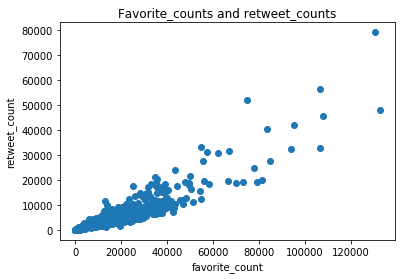

In [91]:
# sort favorite_count and corresponding retweet_count ascending
favorite_counts = df_tweet.favorite_count.sort_values()
retweet_counts = df_tweet.loc[favorite_counts.index].retweet_count
X = favorite_counts.values
Y = retweet_counts.values

plt.scatter(X, Y)
plt.title('Favorite_counts and retweet_counts')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')

***Conclude***

From plot above, we can see favorite_count have a positive correlation with retweet_count. 

Also, retweet_count largely smaller than favorite_count, since it's more bothering to make a retweet than press like button. With this point, we could use retweet_count as a more rigid source to evaluate how people like these tweets.

### Q3. Is there any relation between time and favorite_counts

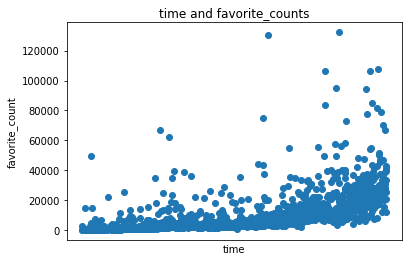

In [92]:
# sort favorite_count and corresponding retweet_count ascending
time_ = df_tweet.timestamp.sort_values()
favorite_counts = df_tweet.loc[time_.index].favorite_count
X = time_.values
Y = favorite_counts.values

plt.scatter(X, Y)
plt.title('time and favorite_counts')
plt.xlabel('time')
plt.ylabel('favorite_count')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

We also curious will time the tweet posted affect favorite count. Next, we'll split time into four periods:

- 23:00:00 - 8:00:00

- 8:00:00 - 12:00:00

- 12:00:00 - 18:00:00

- 18:00:00 - 23:00:00

Text(0.5,0,'time')

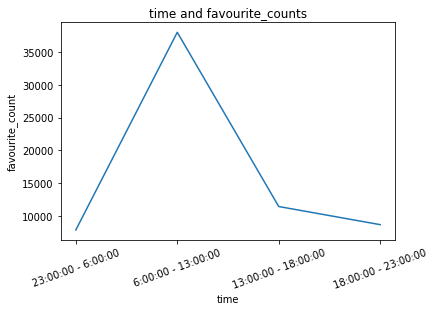

In [93]:
df_time_favorite = df_tweet[['favorite_count']].set_index(pd.DatetimeIndex(df_tweet['timestamp']))
# split time into four periods
df_night = df_time_favorite.between_time('23:00:00', '6:00:00')
df_morning = df_time_favorite.between_time('6:00:00', '13:00:00')
df_afternoon = df_time_favorite.between_time('13:00:00', '18:00:00')
df_evening = df_time_favorite.between_time('18:00:00', '23:00:00')
# plot
Y = [df_night.mean(), df_morning.mean(), df_afternoon.mean(), df_evening.mean()]
plt.plot(Y)
plt.title('time and favourite_counts')
plt.ylabel('favourite_count')
plt.xticks(np.arange(4), ('23:00:00 - 6:00:00', '6:00:00 - 13:00:00', '13:00:00 - 18:00:00', '18:00:00 - 23:00:00'), rotation=20)
plt.xlabel('time')

***Conclude***

Basically, there's a positive correlation betweet these two variables, which is not very rigid. 

We could also observe there's some points where much more favorite_count than expected, and at any time, there are tweets not very popular.

In next plot, we could observe that tweets posted in day get more favorite than those tweeted in night.

### Q4. How many source of tweets?

In [94]:
df_tweet.source.value_counts()

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

***Conclude***

Of course, we could do this by observation.

iPhone is most used platform, which is not surprised, then we have three other platforms, both are far less used than iPhone.

### Q5. Which stage of dogs get most highest score?

In [95]:
df_stage.groupby('Stage').score.describe()

,count,mean,std,min,25%,50%,75%,max
Stage,,,,,,,,
doggo,70.0,1.184286,0.142071,0.8,1.10,1.2,1.3,1.4
floofer,7.0,1.200000,0.115470,1.0,1.15,1.2,1.3,1.3
pupper,211.0,1.065531,0.175933,0.3,1.00,1.1,1.2,1.4
puppo,23.0,1.204348,0.129609,0.9,1.15,1.2,1.3,1.4


***Conclude***

From table above, puppo is a little popular than other three stage of dogs. It has largest mean and little std, from it's qartile, we can further confirm the conclusion.

**Note**

I wonder if we could extract some example from doggo and pupper, then use hypothetical test to confirm it statistically.

### Q6. Will follower become more as time past?

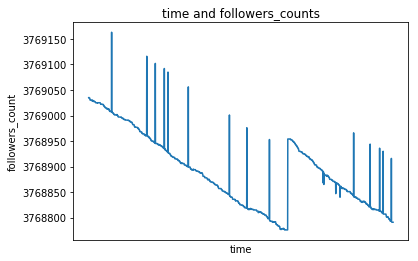

In [96]:
# sort favorite_count and corresponding retweet_count ascending
time_ = df_tweet.timestamp.sort_values()
followers_counts = df_tweet.loc[time_.index].followers_count
X = time_.values
Y = followers_counts.values

plt.plot(X, Y)
plt.title('time and followers_counts')
plt.xlabel('time')
plt.ylabel('followers_count')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

***Conclude***

So, we could tell from the plot that we don't always have more followers with time past, there are some peaks from time to time.

At the same time, the follower number fluctuate around 3,768,950.